In [1]:
from timeit import default_timer as timer
start = timer()

In [2]:
import re
from os import listdir
import networkx as nx
import numpy as np
import pandas as pd
import codecs
import csv
import matplotlib.pylab as plt
from matplotlib import rcParams
rcParams['axes.titlepad'] = 25
from datetime import datetime
import random

In [3]:
g = nx.read_gpickle("rawNetwork.gpickle")

In [4]:
len(g.edges())

1704641

In [5]:
gReduced = nx.Graph()

In [6]:
i = 0
for edge in g.edges():
    if(i>10000):
        break
    n1 = edge[0]
    n2 = edge[1]
    gReduced.add_node(n1,type = g.node[n1]["type"])
    gReduced.add_node(n2,type = g.node[n2]["type"])
    gReduced.add_edge(n1,n2)
    i+=1

In [7]:
colorsParty = ['navy' if gReduced.node[n]['type'] == 'cust' else 'crimson' for n in gReduced.nodes()]

In [8]:
# We import the needed libraries, we set the several ForceAtlas parameters and we compute the node positions.
from fa2 import ForceAtlas2
forceatlas2 = ForceAtlas2(
                          # Behavior alternatives
                          outboundAttractionDistribution=False,  # Dissuade hubs
                          linLogMode=False,  # NOT IMPLEMENTED
                          adjustSizes=False,  # Prevent overlap (NOT IMPLEMENTED)
                          edgeWeightInfluence=1.0,

                          # Performance
                          jitterTolerance=20.0,  # Tolerance
                          barnesHutOptimize=True,
                          barnesHutTheta=2.5,
                          multiThreaded=False,  # NOT IMPLEMENTED

                          # Tuning
                          scalingRatio=10.0,
                          strongGravityMode=False,
                          gravity=200.0,

                          # Log
                          verbose=True)

positions = forceatlas2.forceatlas2_networkx_layout(gReduced, pos = None, iterations = 2000)

 17%|█████████████▏                                                                 | 333/2000 [02:24<17:26,  1.59it/s]

KeyboardInterrupt: 

In [ ]:
# We plot the undirected network.
nx.drawing.nx_pylab.draw(gReduced, positions, nodelist = gReduced.nodes(), cmap = plt.get_cmap('jet'), with_labels = False, edge_color = 'dimgrey', node_color = colorsParty, width = 0.5)
plt.title('Politic retweets network based on degrees')
plt.show()

In [9]:
len(gReduced.nodes())

11298

In [18]:
nx.drawing.nx_pylab.draw(gReduced, nodelist = gReduced.nodes(), cmap = plt.get_cmap('jet'),node_size=1, with_labels = False, edge_color = 'dimgrey', node_color = colorsParty, width = 0.5)

In [19]:
plt.rcParams["figure.figsize"] = (15,15)

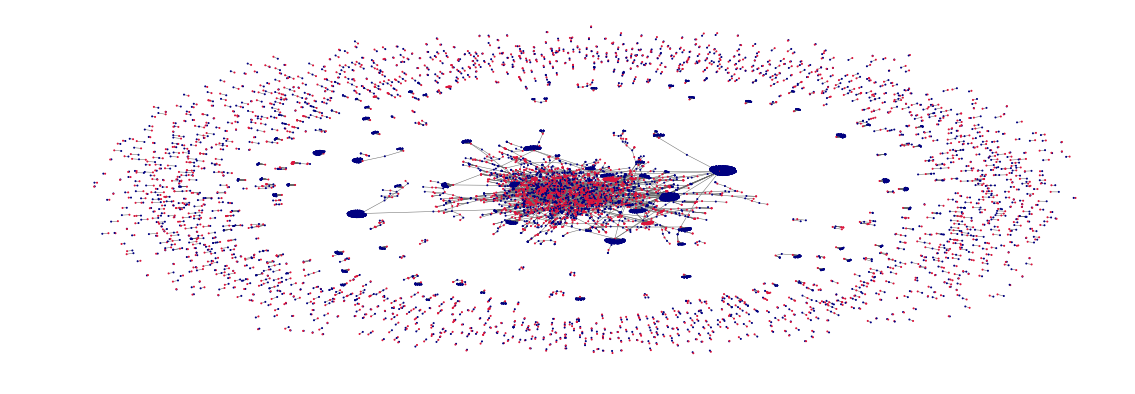

In [20]:
plt.show()